In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Datasets/Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isna()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


In [7]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
#calculate % of null value present in data
df.isna().sum()/df.shape[0]*100 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
df["Request timestamp"].value_counts() 

11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 8:37         6
11/7/2016 17:57        6
12/7/2016 19:17        5
                      ..
11/7/2016 11:17        1
13-07-2016 02:27:48    1
11/7/2016 3:07         1
14-07-2016 15:03:23    1
15-07-2016 17:24:24    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [12]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [13]:
df["Request timestamp"]

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [14]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)


In [15]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN


In [16]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [17]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [19]:
req_hour=df["Request timestamp"].dt.hour


In [20]:
df["req_hour"]=req_hour

In [21]:
req_day=df["Request timestamp"].dt.day

In [22]:
df["req_day"]=req_day

In [23]:
len(req_hour)

6745

In [24]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


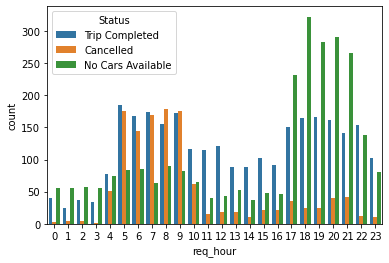

In [25]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


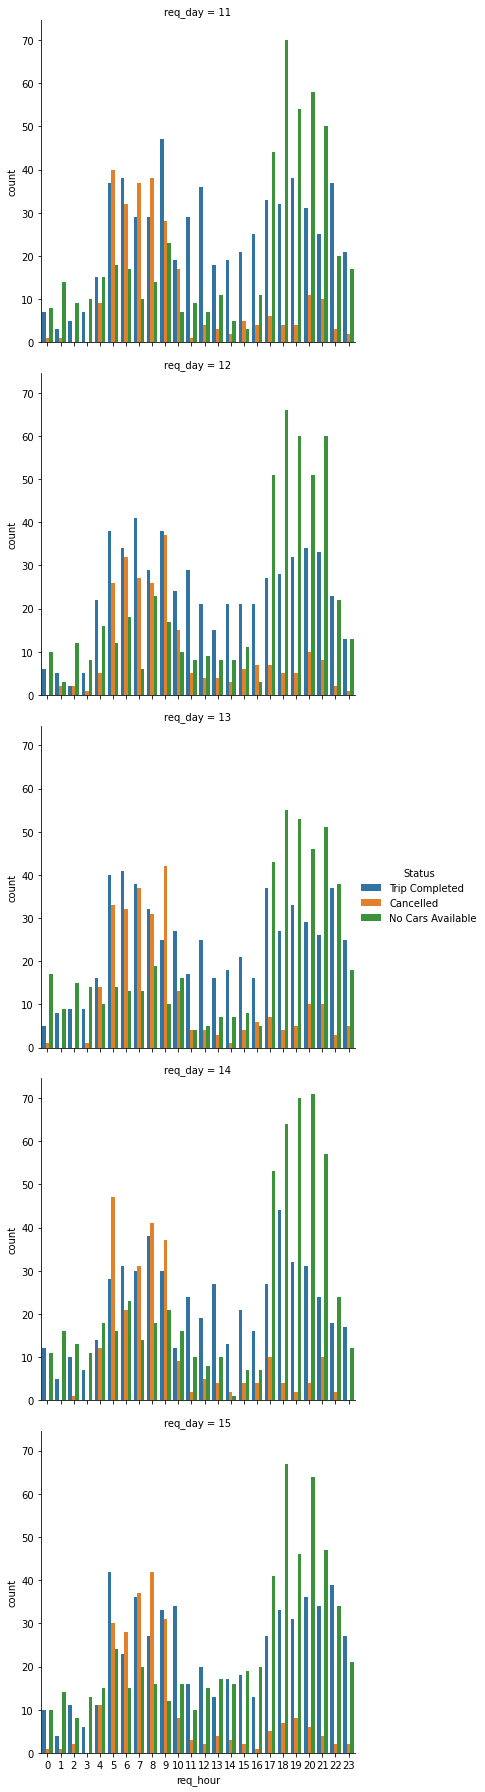

In [26]:
sns.factorplot(x="req_hour",data=df,kind="count",row="req_day",hue="Status")
plt.show()

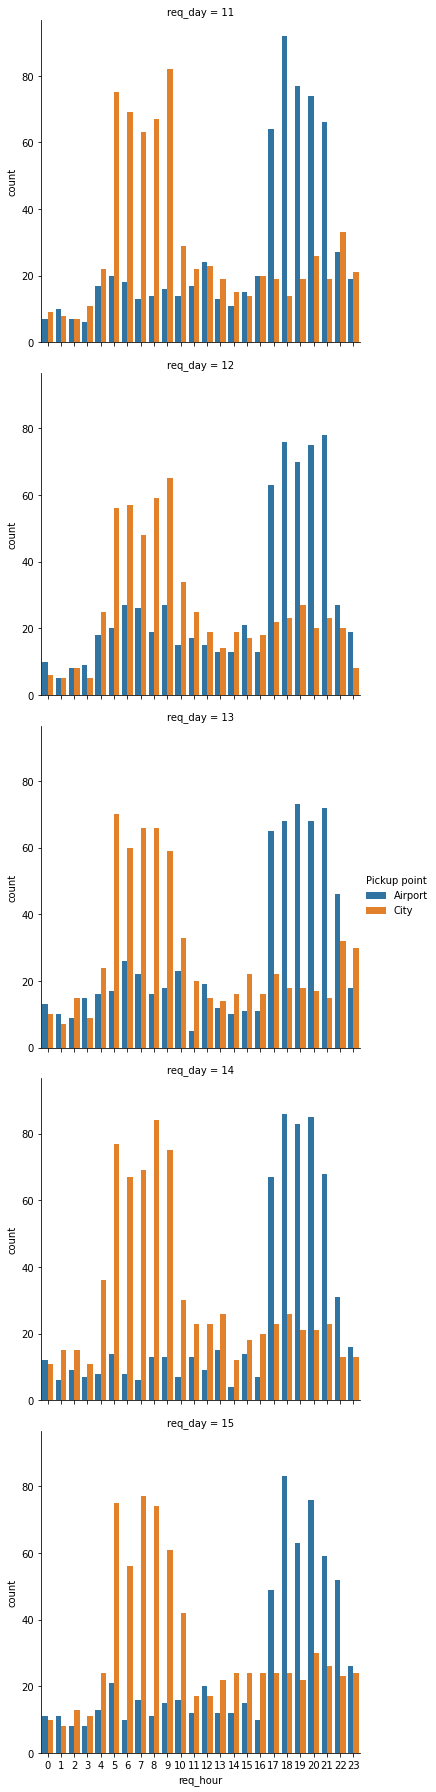

In [27]:
sns.factorplot(x="req_hour",data=df,kind="count",row="req_day",hue="Pickup point")
plt.show()

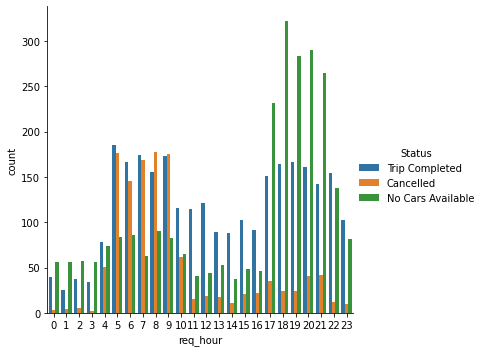

In [28]:
sns.factorplot(x="req_hour",data=df,kind="count",hue="Status")
plt.show()

In [29]:
df["Time_slot"]=0

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [31]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]= "Pre_Morning"
    elif df.iloc[j,6]<10:
        df.iloc[j,8]= "Morning_Rush"
    elif df.iloc[j,6]<17:
        df.iloc[j,8]= "Day_time"
    elif df.iloc[j,6]<22:
        df.iloc[j,8]= "Evening_Rush"
    else:
        df.iloc[j,8]= "Late_night"
        
    j=j+1

In [32]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_night


In [33]:
df["Time_slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_time        1224
Pre_Morning      578
Late_night       498
Name: Time_slot, dtype: int64

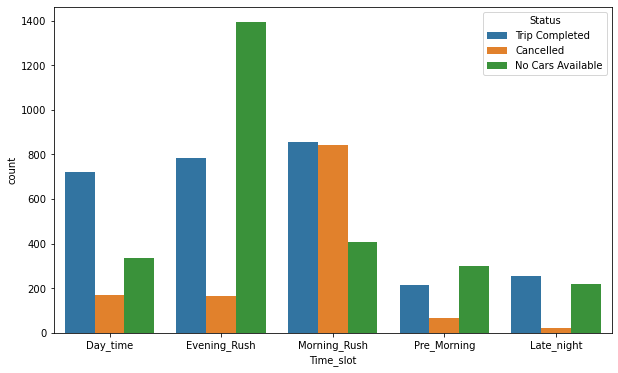

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_slot",data=df,hue="Status")
plt.show()

In [35]:
df_Morning_Rush=df[df["Time_slot"]=="Morning_Rush"]
df_Evening_Rush=df[df["Time_slot"]=="Evening_Rush"]

In [36]:
type(df_Morning_Rush)

pandas.core.frame.DataFrame

In [37]:
df_Morning_Rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [38]:
df_Evening_Rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


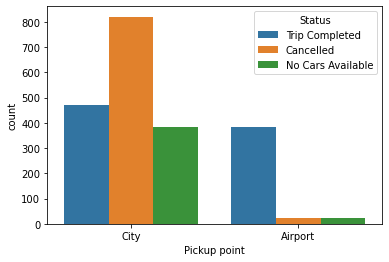

In [39]:
sns.countplot(x="Pickup point",data=df_Morning_Rush,hue="Status")
plt.show()

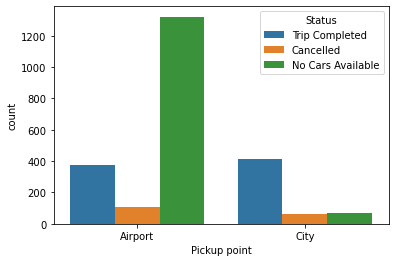

In [40]:
sns.countplot(x="Pickup point",data=df_Evening_Rush,hue="Status")
plt.show()

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [41]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") & (df_Morning_Rush["Status"]=="Cancelled")]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2909,1462,Airport,23.0,Cancelled,2016-07-12 05:01:00,NaT,5,12,Morning_Rush
2910,196,Airport,24.0,Cancelled,2016-07-11 06:07:00,NaT,6,11,Morning_Rush
2944,5847,Airport,31.0,Cancelled,2016-07-15 09:05:38,NaT,9,15,Morning_Rush
3130,2844,Airport,74.0,Cancelled,2016-07-13 05:28:12,NaT,5,13,Morning_Rush
3157,5806,Airport,81.0,Cancelled,2016-07-15 08:46:33,NaT,8,15,Morning_Rush
3202,3018,Airport,92.0,Cancelled,2016-07-13 07:27:44,NaT,7,13,Morning_Rush
3254,5854,Airport,103.0,Cancelled,2016-07-15 09:09:32,NaT,9,15,Morning_Rush
3315,174,Airport,119.0,Cancelled,2016-07-11 05:44:00,NaT,5,11,Morning_Rush
3349,1776,Airport,128.0,Cancelled,2016-07-12 09:02:00,NaT,9,12,Morning_Rush


In [42]:
df_airport_cancelled=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") & (df_Morning_Rush["Status"]=="Cancelled")]

In [43]:
df_airport_cancelled.shape[0]

23

In [44]:
df_city_cancelled=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") & (df_Morning_Rush["Status"]=="Cancelled")]

In [45]:
df_city_cancelled.shape[0]

820

# # Severity of problem by location and their count (cancellation of cab as per the pickup location at evening rush hours)

In [46]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="Airport") & (df_Evening_Rush["Status"]=="Cancelled")].shape[0]

106

In [47]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="City") & (df_Evening_Rush["Status"]=="Cancelled")].shape[0]

60

# Supply and demand

In [48]:
df_Morning_Rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [49]:
df_Evening_Rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


## Morning-City

In [50]:
df_Morning_Rush.loc[df_Morning_Rush["Pickup point"]=="City"].shape[0]

1677

In [51]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") & (df_Morning_Rush["Status"]=="Trip Completed")].shape[0]

472

In [52]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") & (df_Morning_Rush["Status"]=="No Cars Available")].shape[0]

385

In [53]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") & (df_Morning_Rush["Status"]=="Cancelled")].shape[0]

820

## Morning-Airport

In [54]:
df_Morning_Rush.loc[df_Morning_Rush["Pickup point"]=="Airport"].shape[0]

426

In [55]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") & (df_Morning_Rush["Status"]=="Trip Completed")].shape[0]

382

In [56]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") & (df_Morning_Rush["Status"]=="No Cars Available")].shape[0]

21

In [57]:
df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") & (df_Morning_Rush["Status"]=="Cancelled")].shape[0]

23

## Evening-City

In [58]:
df_Evening_Rush.loc[df_Evening_Rush["Pickup point"]=="City"].shape[0]

542

In [59]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="City") & (df_Evening_Rush["Status"]=="Trip Completed")].shape[0]

411

In [60]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="City") & (df_Evening_Rush["Status"]=="No Cars Available")].shape[0]

71

In [61]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="City") & (df_Evening_Rush["Status"]=="Cancelled")].shape[0]

60

## Evening-Airport

In [62]:
df_Evening_Rush.loc[df_Evening_Rush["Pickup point"]=="Airport"].shape[0]

1800

In [63]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="Airport") & (df_Evening_Rush["Status"]=="Trip Completed")].shape[0]

373

In [64]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="Airport") & (df_Evening_Rush["Status"]=="No Cars Available")].shape[0]

1321

In [65]:
df_Evening_Rush.loc[(df_Evening_Rush["Pickup point"]=="Airport") & (df_Evening_Rush["Status"]=="Cancelled")].shape[0]

106

# Pie Chart

## Morning-City

In [66]:
df_morning_city=df.loc[(df["Pickup point"]=="City")&(df["Time_slot"]=="Morning_Rush")]

In [67]:
df_morning_city["Status"].value_counts()

Cancelled            820
Trip Completed       472
No Cars Available    385
Name: Status, dtype: int64

In [68]:
pd.DataFrame(df_morning_city["Status"].value_counts())

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [69]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [70]:
df_morning_city_count["Status"].values

array([820, 472, 385], dtype=int64)

In [71]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

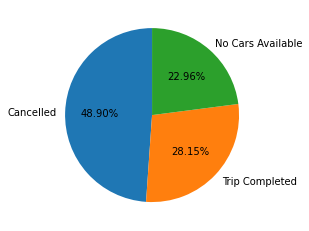

In [72]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

## Evening Airport

In [73]:
df_evening_city=df.loc[(df["Pickup point"]=="Airport")&(df["Time_slot"]=="Evening_Rush")]

In [74]:
df_evening_city["Status"].value_counts()

No Cars Available    1321
Trip Completed        373
Cancelled             106
Name: Status, dtype: int64

In [75]:
df_evening_city_count=pd.DataFrame(df_evening_city["Status"].value_counts())

In [76]:
df_evening_city_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [77]:
df_evening_city_count["Status"].values

array([1321,  373,  106], dtype=int64)

In [78]:
df_evening_city_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

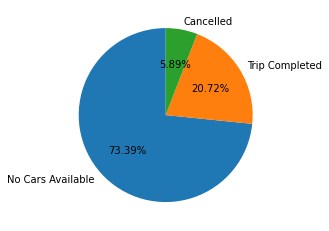

In [79]:
fig,ax=plt.subplots()
ax.pie(df_evening_city_count["Status"].values,labels=df_evening_city_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

- Inferences 1:They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure that less number of trips are cancelled
- Inferences 2:Uber can pay for the gas mileage of drivers to come back to the city without a ride.
- Inferences 3:Drivers can again be given bonus to complete a trip from the airport in the evening. This will ensure that the supply increass at the airport. 
- Inferences 4:Uber can also pay drivers to come without a passenger to the airport.
- Inferences 5:Another way could be to increass licences of car pooling taxis so that lesser number of cars can serve more passenger.